In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from lifelines import KaplanMeierFitter, CoxPHFitter

In [5]:
df = pd.read_csv(r"C:\Users\shrut\Downloads\Breast Cancer METABRIC(in).csv")

In [6]:
# Select relevant columns
survival_data = df[['Overall Survival (Months)', 'Overall Survival Status', 'Age at Diagnosis', 'Tumor Size', 'Tumor Stage']].copy()


In [7]:
# Rename columns for clarity
survival_data.rename(columns={'Overall Survival (Months)': 'Survival_Time', 
                              'Overall Survival Status': 'Event'}, inplace=True)

In [8]:
# Convert survival status to binary (1 = Deceased, 0 = Living)
survival_data['Event'] = survival_data['Event'].map({'Deceased': 1, 'Living': 0})

In [9]:
# Drop missing values
survival_data.dropna(inplace=True)

In [10]:
# Kaplan-Meier Survival Analysis
kmf = KaplanMeierFitter()
kmf.fit(survival_data['Survival_Time'], event_observed=survival_data['Event'])


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1459 total observations, 639 right-censored observations>

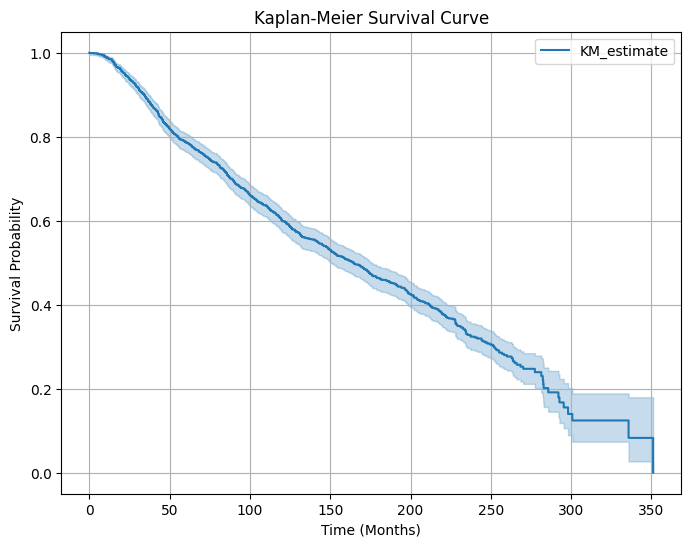

In [11]:
# Plot Kaplan-Meier survival curve
plt.figure(figsize=(8, 6))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

<lifelines.CoxPHFitter: fitted with 1459 total observations, 639 right-censored observations>
             duration col = 'Survival_Time'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 1459
number of events observed = 820
   partial log-likelihood = -5271.90
         time fit was run = 2025-03-13 19:40:42 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
Age at Diagnosis  0.03      1.03      0.00            0.03            0.04                1.03                1.04
Tumor Size        0.01      1.01      0.00            0.01            0.01                1.01                1.01
Tumor Stage       0.40      1.49      0.06            0.28            0.53                1.32                1.69

                  cmp to     z      p  -log2(p)
covariate                                      
Age at Diagnosis    0.00 10.67 <0.005     85.87
Tumor Size          0.00  4.48 <0.005     17.02
Tumor Stage         0.00  6.32 <0.005     31.83
---
Concordance = 0.64
Partial AIC = 10549.79
log-likelihood ratio test = 247.87 on 3 df
-log2(p) of ll-ratio test = 175.14

<Axes: xlabel='log(HR) (95% CI)'>

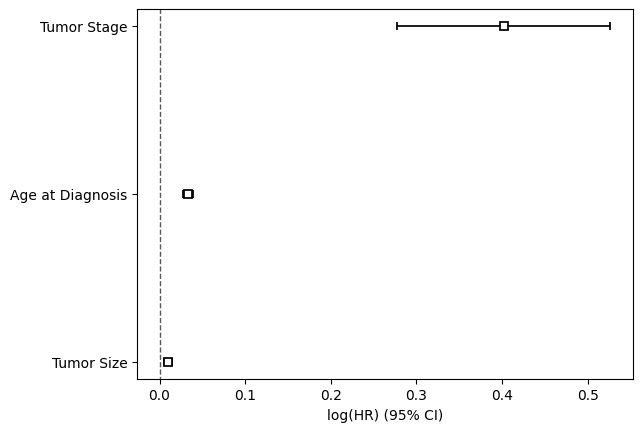

In [12]:
# Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(survival_data, duration_col='Survival_Time', event_col='Event')
cph.print_summary()  # Display hazard ratios

# Plot Cox model coefficients
cph.plot()
